In [1]:
import sys
import scipy as sc
from lmfit import Minimizer, Parameters, report_fit
from numpy import exp, log
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# from multiprocessing import Process
from model_comparison import get_AIC, get_BIC
from model_residuals import *
from model_visualisation import *
from find_best_fit import find_best_fit, add_params

In [21]:
k = 8.617e-5
d = pd.DataFrame(pd.read_csv("../Data/ThermRespData.csv"))
d = d[d['OriginalTraitValue'] > 0]
d['LoggedOriginalTraitValue'] = log(d['OriginalTraitValue'])
d = d[["ID", "ConTemp", "OriginalTraitValue",
        "LoggedOriginalTraitValue", "OrignalTraitName",  "OriginalTraitUnit"]]
# B0 = []
# for i in d['ID']:
#     sub = d[d["ID"] == i]
#     B0.append(np.mean(sub["ConTemp"]))
B0 = pd.DataFrame(d.groupby(["ID"]).mean()["ConTemp"])
B0 = list(d.set_index("ID").index.to_series().map(B0['ConTemp']))
d['B0'] = B0
# d["B0"] = 
# d
# d = d[d['LoggedOriginalTraitValue'] > -20]
# np.asarray(d['ConTemp'][d['ID'] == 3])
# d.columns.values
# d['OrignalTraitName'].unique()
# d['OrignalTraitName'].unique()
# sub['OriginalTraitUnit'].unique()[0]
# sub
# plt.plot(sub['ConTemp'], sub['LoggedOriginalTraitValue'], 'r+', markersize=15,
#         markeredgewidth=2, label='Data')
# d[['OriginalTraitValue', 'ConTemp', 'LoggedOriginalTraitValue']].describe()

,ID,ConTemp,OriginalTraitValue,LoggedOriginalTraitValue,OrignalTraitName,OriginalTraitUnit,B0
0,1,20.0,9.876141,2.290122,photosynthetic co2 assimilation,micromol m^-2 s^-1,30.0
1,1,25.0,11.743801,2.463326,photosynthetic co2 assimilation,micromol m^-2 s^-1,30.0
2,1,30.0,10.582731,2.359224,photosynthetic co2 assimilation,micromol m^-2 s^-1,30.0
3,1,35.0,6.508309,1.873080,photosynthetic co2 assimilation,micromol m^-2 s^-1,30.0
4,1,40.0,2.664421,0.979987,photosynthetic co2 assimilation,micromol m^-2 s^-1,30.0
...,...,...,...,...,...,...,...
11763,903,15.0,1.690495,0.525021,dark respiration rate,mg co2 dm^-2 h^-1,22.5
11764,903,20.0,2.453805,0.897640,dark respiration rate,mg co2 dm^-2 h^-1,22.5
11765,903,25.0,3.381483,1.218314,dark respiration rate,mg co2 dm^-2 h^-1,22.5
11766,903,30.0,3.733874,1.317446,dark respiration rate,mg co2 dm^-2 h^-1,22.5


In [ ]:
res_aic = pd.read_csv("../Results/fitting_info_aic.csv")
res_bic = pd.read_csv("../Results/fitting_info_bic.csv")
res_aic['Best_fit'].unique()

In [12]:
print(len(res_aic[res_aic['Best_fit'] == 'Cubic'])/len(res_aic['Best_fit']))
print(len(res_aic[res_aic['Best_fit'] == 'Schoolfield'])/len(res_aic['Best_fit']))
print(len(res_aic[res_aic['Best_fit'] == 'Briere'])/len(res_aic['Best_fit']))
print(len(res_aic[res_aic['Best_fit'] == 'Quadratic'])/len(res_aic['Best_fit']))
print(len(res_aic[res_aic['Best_fit'] == 'Linear'])/len(res_aic['Best_fit']))

0.4701240135287486
0.14205186020293123
0.11950394588500564
0.1871476888387824
0.08117249154453213


In [13]:
print(len(res_aic[res_bic['Best_fit'] == 'Cubic'])/len(res_bic['Best_fit']))
print(len(res_aic[res_bic['Best_fit'] == 'Schoolfield'])/len(res_bic['Best_fit']))
print(len(res_aic[res_bic['Best_fit'] == 'Briere'])/len(res_bic['Best_fit']))
print(len(res_aic[res_bic['Best_fit'] == 'Quadratic'])/len(res_bic['Best_fit']))
print(len(res_aic[res_bic['Best_fit'] == 'Linear'])/len(res_bic['Best_fit']))

0.4701240135287486
0.14430665163472378
0.11950394588500564
0.1871476888387824
0.07891770011273957


In [6]:
fit_school, AIC_school, BIC_school = find_best_fit(
    sub['ConTemp'],
    sub['LoggedOriginalTraitValue'],
    params=('B0', 'E', 'E_h', 'T_h'),
    method='uniform',
    # mean_sd_norm=([0.5, 2.1], [1.2, 0.7],
    #                 [45.21, 44.98], [36.85, 10.5]),
    value_range = ([-3, 3], [0.01, 2], [0.03, 3], [26.85, 43.15]),
    test_number=20,
    log_scale = True,
    residuals_model=residuals_school_log,
    log_scale_residuals_model=residuals_school_original,
    min_=(None, 0, 0, None),
    max_=(None, None, None, None)
)

error
error
error
error
error
error
error
error
error
error
error
error
Minimum AIC:  69.1434761855271
Minimum BIC:  70.73505727672058 

Initial values used:
B0: 1.367000
E: 0.234000
E_h: 0.625000
T_h: 32.865000


Converged Info:
Name     Value   Stderr      Min      Max
B0      320.3     1299     -inf      inf
E    0.005227  0.01036        0      inf
E_h   0.02757  0.03811        0      inf
T_h     39.99    13.99     -inf      inf




In [35]:
fit_briere, AIC_briere, BIC_briere = find_best_fit(
    sub['ConTemp'],
    sub['OriginalTraitValue'],
    params_add=('B0', 'T0', 'Tm'),
    method = 'normal',
    mean_sd_norm=([0.01, 0.5], [0, 5], [56.85, 5.5]),
    test_number=4,
    residuals_model=residuals_briere
)

Minimum AIC:  44.81076718773815
Minimum BIC:  43.63908092504045 

Initial values used:
B0: -0.508000
T0: 1.769000
Tm: 57.120000


Converged Info:
Name     Value   Stderr      Min      Max
B0   0.00168     None     -inf      inf
T0     46.31     None     -inf      inf
Tm     114.7     None     -inf      inf


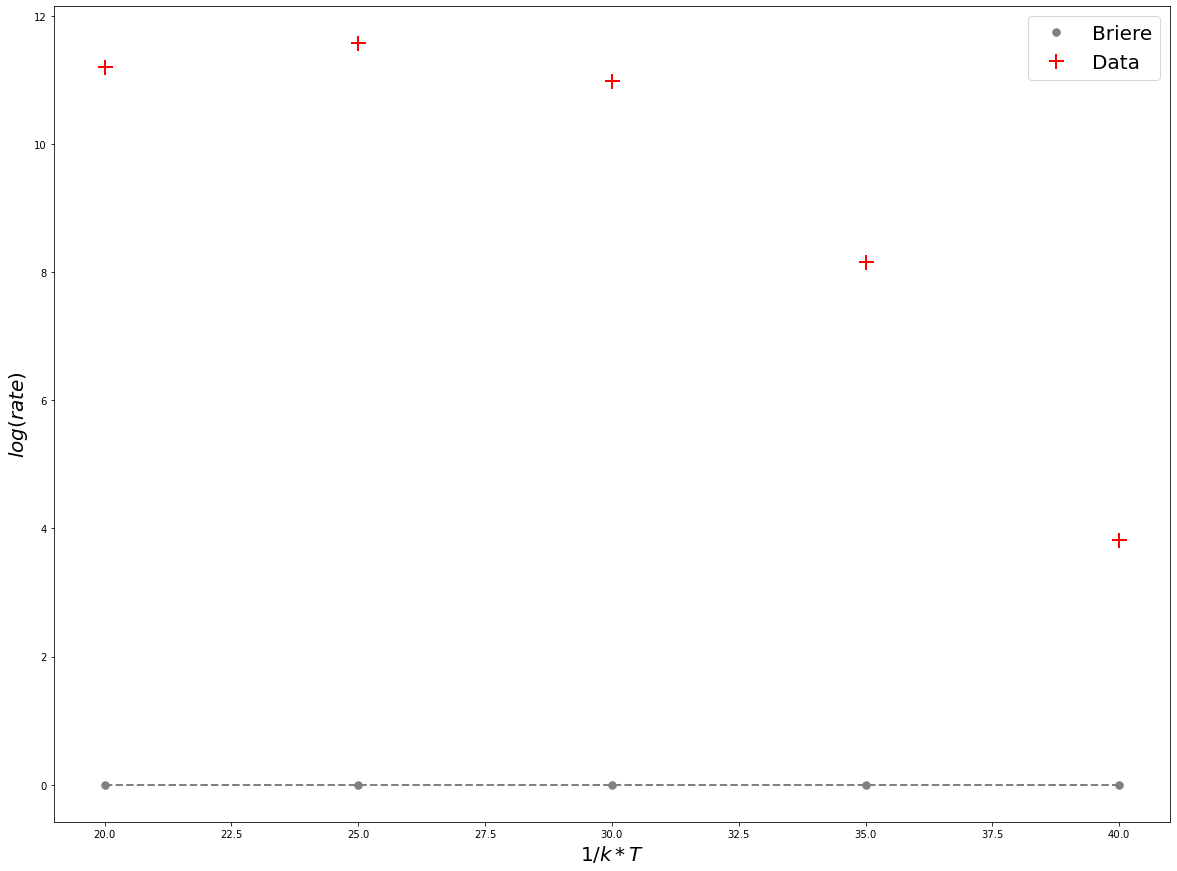

In [36]:
fitting_plot_NLLS(
    x=sub['ConTemp'],
    y=sub['OriginalTraitValue'],
    fit_model=(fit_briere,),
    residuals_model=(residuals_briere,),
    name=("Briere",),
    color=("grey",),
    log_scale=False,
)

plt.plot(sub['ConTemp'], sub['OriginalTraitValue'], 'r+', markersize=15,
        markeredgewidth=2, label='Data')

# Plot legend
plt.legend(fontsize=20)
plt.xlabel(r'$1/k*T$', fontsize=20)
plt.ylabel(r'$log(rate)$', fontsize=20)
plt.ticklabel_format(style='scientific', scilimits=[0, 3])

In [20]:
p1 = Process(
    target=find_best_fit,
    kwargs = {
            'x': sub['ConTemp'], 
            'y': sub['OriginalTraitValue'],
            'arams_add': ('B0', 'T0', 'Tm'), 
            'method': 'normal', 
            'mean_sd_norm':([0.01, 2.1], [-10, 10], [36.85, 15.55]), 
            'test_number':12,
            'residuals_model':residuals_briere
            }
)

p2 = Process(
    target=find_best_fit,
    kwargs={
        'x': sub['ConTemp'], 
        'y': sub['OriginalTraitValue'],
        'arams_add': ('B0', 'E', 'E_h', 'T_h'),
        'method': 'uniform',
        'value_range': ([-3, 3], [0.01, 2], [0.03, 3], [26.85, 43.15]),
        'test_number': 20,
        'log_scale': True,
        'residuals_model': residuals_school_log,
        'min_' = (None, 0, 0, None),
        'max_' = (None, None, None, None)
    }   
)

Minimum AIC:  27.565424785543087
Minimum BIC:  26.39373852284539 

Initial values used:
B0: -0.902000
T0: 12.059000
Tm: 70.855000


Converged Info:
Name     Value   Stderr      Min      Max
B0  1.498e-06 0.006577     -inf      inf
T0  -8.593e+04 3.75e+08     -inf      inf
Tm     38.23    6.229     -inf      inf


In [4]:
np.random.seed(111)
fit_school_log = find_best_fit(
    sub['ConTemp'],
    sub['LoggedOriginalTraitValue'],
    params_add=('B0', 'E', 'E_h', 'T_h'),
    method='uniform',
    # mean_sd_norm=([0.5, 2.1], [1.2, 0.7],
    #                 [45.21, 44.98], [36.85, 10.5]),
    value_range = ([-3, 3], [0.01, 2], [0.03, 3], [26.85, 43.15]),
    test_number=20,
    log_scale = True,
    residuals_model=residuals_school_log,
    verbose=False,
    min_=(None, 0, 0, None),
    max_=(None, None, None, None)
)

Minimum AIC:  6.566725347276829
Minimum BIC:  5.004476997013231 

Initial values used:
B0: 0.263000
E: 0.365000
E_h: 0.563000
T_h: 29.289000


Converged Info:
Name     Value   Stderr      Min      Max
B0      20.87    4.196     -inf      inf
E    0.001373 0.000416        0      inf
E_h   0.03242 0.002283        0      inf
T_h     34.46   0.6265     -inf      inf


In [27]:
model_AICs = {"Linear": 0.574,
                "Quadratic": 3.124,
                "Cubic": 0.789,
                "Briere": inf,
                "Schoolfield": -0.213}
min(model_AICs, key = model_AICs.get)

NameError: name 'inf' is not defined

In [17]:
params_school = add_params(
    params=('B0', 'E', 'E_h', 'T_h'),
    values=[1.315, 0.071, 1.274, 31.434],
    min_= (None, 0, 0, None),
    max_= (None, None, None, None)
)
params_school

name,value,initial value,min,max,vary
B0,1.31500000,1.315,-inf,inf,True
E,0.07100000,0.071,0.00000000,inf,True
E_h,1.27400000,1.274,0.00000000,inf,True
T_h,31.4340000,31.434,-inf,inf,True


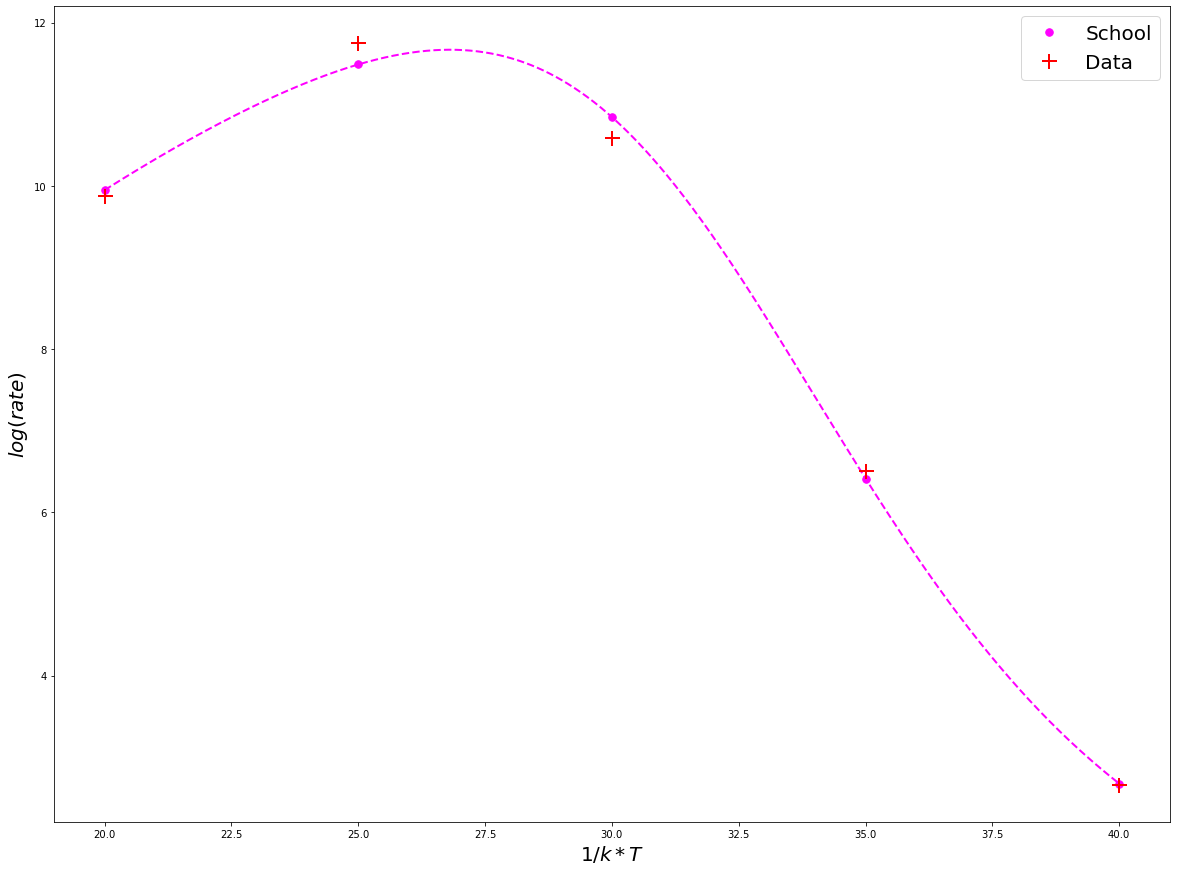

In [5]:
fitting_plot_NLLS(
    x=sub['ConTemp'],
    y=sub['OriginalTraitValue'],
    fit_model=(fit_school_log,),
    residuals_model=(residuals_school_original,),
    name=("School",),
    color=("magenta",),
    log_scale=True,
)

plt.plot(sub['ConTemp'], sub['OriginalTraitValue'], 'r+', markersize=15,
        markeredgewidth=2, label='Data')

# Plot legend
plt.legend(fontsize=20)
plt.xlabel(r'$1/k*T$', fontsize=20)
plt.ylabel(r'$log(rate)$', fontsize=20)
plt.ticklabel_format(style='scientific', scilimits=[0, 3])

In [15]:
fit_school_log = fitting_model(
    x=sub['ConTemp'],
    y=sub['LoggedOriginalTraitValue'],
    residual_model=residuals_school_log,
    params_model=params_school
)

# fit_school_log.params.pretty_print(columns=['value', 'stderr', 'min', 'max'])
for k, v in dict(fit_school_log.params.valuesdict()).items():
    print(k, v)

B0 28.393524019652226
E 0.0007515683381309479
E_h 0.022064890131246573
T_h 52.09692288642459


""


In [5]:
logged_residuals = fit_school_log.residual; logged_residuals
get_AIC(logged_residuals, sub['LoggedOriginalTraitValue'], fit_school_log.params)

-53.3046056778565

In [6]:
original_residuals = residuals_school_exp(fit_school_log.params, sub['ConTemp'], exp(sub['LoggedOriginalTraitValue']))
get_AIC(original_residuals, sub['OriginalTraitValue'], fit_school_log.params)

-5.453376865303138

In [13]:
subsets = []
for i in range(len(d['ID'].unique())):
    if len(d[d['ID'] == i]) > 20:
        subsets.append(i)
subsets

[106,
 156,
 157,
 206,
 237,
 239,
 278,
 303,
 308,
 309,
 310,
 311,
 312,
 313,
 318,
 322,
 323,
 520,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 535,
 564,
 565,
 567,
 569,
 570,
 571,
 572,
 592,
 596,
 654]